<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_final_amostra_03_nov_24_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
#!pip install mahotas

In [3]:
'''
import mahotas.features.texture as mht
import mahotas.features
'''

'\nimport mahotas.features.texture as mht\nimport mahotas.features\n'

In [4]:
'''
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas
'''

'\n!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github\n%cd marquesgabi_fev_2020\nimport Go2BlackWhite\nimport Go2Mahotas\n'

In [5]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


In [7]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [8]:
Size=1200 # tamanho da foto
# ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines


In [10]:
FILE='SugarSample03.zip'
img_name=[]
x_original = [] 

data_file ='xls'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        #df =pd.read_csv(name)
        if( k > 0):
          df_old = df.copy()
        df = pd.read_excel(name)
        df = df.drop(labels=[0], axis=0)
        if(k > 0):
          df = pd.concat( [df, df_old], ignore_index = True)
        k = k + 1

In [11]:
f.namelist()

['Results_03_02.xls', 'Results_03_03.xls', 'Results_03_01.xls']

In [12]:
df.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.288,255,255,255,1.383,1.185,5.847,1.636,767,213,18.157,1.161
1,3,0.407,255,255,255,0.814,0.637,62.186,0.877,283,234,59.036,0.667
2,4,0.592,255,255,255,0.925,0.815,117.923,1.078,633,154,122.335,0.802
3,5,1.391,255,255,255,1.435,1.235,29.966,1.564,1321,333,53.253,1.165
4,6,0.549,255,255,255,0.923,0.758,136.396,1.024,370,254,118.237,0.738


In [13]:
from Segment_Filter import Segmenta  # got image provided segmented

In [14]:
df=Segmenta(img)
Img_Size = 28

In [15]:
print(df)

    Width           0           1  ...         781         782         783
0     139  232.854614  238.962769  ...  175.873611  174.873901  183.617035
1     170  167.081131  162.162354  ...    1.759585    0.744360    0.383668
2     189  149.964325  152.647461  ...  164.183823  174.434830  225.307251
3     173  184.651276  187.003036  ...  172.154724  207.330383  213.416229
4     188   59.334087  106.062462  ...    1.000000    1.000000    1.000000
5     178  108.079796  112.934998  ...  113.183449  110.443130  121.657623
6     154  208.173569  196.404968  ...   16.652895   24.198349   27.471075
7     182   89.023674  103.698227  ...    1.254438    0.124260    1.331361
8     163  148.851257  132.954529  ...  168.847488  160.830582  155.921570
9     130  149.223434  162.546021  ...  228.065109  221.590775  216.742966
10    152  199.560928  196.948044  ...  155.852493  153.283234  138.699448
11    189  170.436218  191.736618  ...  158.744858  147.950623  137.761322
12    159  116.027092   8

In [16]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [17]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [18]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [19]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 152ms/step - loss: 0.5981 - accuracy: 0.7376 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 129ms/step - loss: 0.3143 - accuracy: 0.8776 - val_loss: 0.6933 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 124ms/step - loss: 0.2752 - accuracy: 0.8863 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 128ms/step - loss: 0.2258 - accuracy: 0.9155 - val_loss: 0.6935 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 127ms/step - loss: 0.1363 - accuracy: 0.9359 - val_loss: 0.6941 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 129ms/step - loss: 0.0934 - accuracy: 0.9650 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 128ms/step - loss: 0.0478 - accuracy: 0.9883 - val_loss: 0.6956 - val_accuracy: 0.5102

In [21]:
Y_test = yback(Y_test)

In [22]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        70   2
1         4  71


In [23]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.97      0.95      0.96        75

    accuracy                           0.96       147
   macro avg       0.96      0.96      0.96       147
weighted avg       0.96      0.96      0.96       147



In [24]:
'''
#X =np.array(df.copy())/255.0 
X =np.array(df.copy())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  
prediction = model.predict(X_test)  
y =np.copy(y_test)
data = {'y_true': y_test,'y_predict': prediction}  
# este dado esta no formato de dicionario
df = pd.DataFrame(data, columns=['y_true','y_predict'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)
y_true = df['y_true']
y_pred = df['y_predict']  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
print(METRICS)
#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh',                       solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  prediction = model.predict(X_test)  y =np.copy(y_test)data = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionariodf = pd.DataFrame(data, columns=['y_true','y_predict'])confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])print(confusion_matrix)y_true = df['y_true']y_pred = df['y_predict']
'''

"\n#X =np.array(df.copy())/255.0 \nX =np.array(df.copy())\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)\nmodel = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  \nprediction = model.predict(X_test)  \ny =np.copy(y_test)\ndata = {'y_true': y_test,'y_predict': prediction}  \n# este dado esta no formato de dicionario\ndf = pd.DataFrame(data, columns=['y_true','y_predict'])\nconfusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])\nprint(confusion_matrix)\ny_true = df['y_true']\ny_pred = df['y_predict']  \nMETRICS=sklearn.metrics.classification_report(y_true, y_pred)\nprint(METRICS)\n#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='ta

In [25]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [26]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction= np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   157.0  175.344482  177.915619  ...  177.862671  183.587906  189.601364
1   133.0  124.376732  125.191139  ...  177.182831  166.695282  163.526306
3   123.0  180.582352  180.984604  ...  191.248413  192.686493  203.787964
6   102.0  178.883530  178.805099  ...  176.359863  168.362564  160.341797
8   146.0  230.515106  216.956848  ...    0.995496    0.972978    1.007881
17  106.0  137.002136  144.246002  ...  116.906372  125.475967  131.228912
20  130.0  172.528061  169.815140  ...  159.675507  163.724747  162.381317
22  194.0  148.494629  149.613113  ...    2.848230    1.284090    0.413859
31  161.0  158.026459  169.304367  ...  170.436676  182.920609  175.400757
32  159.0  118.642181  129.003555  ...  176.943787  173.552429  163.428772
36  112.0    0.750000    1.500000  ...    0.812500    1.562500    1.562500
37  143.0    1.498851    0.435718  ...  130.223434  130.882233  129.761307
38  198.0  135.184875  14

In [27]:
Width=np.array(Width_new)

In [28]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [29]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 6.89 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [30]:
PSD_new.shape

(95, 2)

In [31]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [32]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,157.0,175.344482,177.915619,170.963257,164.714630,171.085693,165.214142,139.734711,155.191406,176.499466,179.633224,178.529678,172.041870,172.663879,175.796997,178.129089,170.896027,161.869827,146.862396,145.305252,166.992218,184.215973,189.964188,190.954636,186.426758,178.154785,173.941071,161.570038,157.885757,184.488297,186.257462,176.524216,167.830231,169.812302,167.865753,158.502380,149.960541,166.336700,175.124725,182.149887,...,183.021866,178.970840,174.308929,177.395782,173.603470,169.884705,166.002609,164.962738,166.616714,166.231140,172.383865,186.319107,175.957199,178.063507,177.895737,171.464325,196.994171,246.752762,249.770065,231.748154,194.174072,187.462906,196.443146,196.556091,187.366791,184.571548,187.085159,191.395264,191.930954,186.039703,177.824219,174.439728,172.183609,173.104385,170.588196,162.182480,167.321869,177.862671,183.587906,189.601364
1,133.0,124.376732,125.191139,125.321327,123.936295,124.842102,122.481987,115.667587,91.412743,93.166206,137.609421,146.947372,144.481995,146.623276,144.457062,133.221603,127.653740,122.653748,122.725761,121.828247,118.542931,117.019402,109.274239,105.573410,107.933517,147.412720,170.249298,173.986145,175.110794,120.914131,123.556793,127.797798,127.598343,132.476456,123.645432,121.512466,100.880890,96.473686,141.847641,148.581726,...,131.678680,130.099716,131.049866,156.722992,169.340714,180.437668,184.265945,193.656525,195.127426,196.734070,191.747925,184.235458,127.504150,121.310257,127.756241,140.260391,150.487534,156.066483,164.620483,165.833801,163.540161,160.631561,165.277023,172.756226,159.955673,130.049866,128.019394,124.601105,127.855957,129.368408,131.542938,155.576172,167.240982,178.548477,182.626038,182.952911,183.875336,177.182831,166.695282,163.526306
3,123.0,180.582352,180.984604,185.103195,176.423569,182.031342,175.333603,169.244308,181.865631,193.934296,196.919693,203.053284,203.502502,199.893661,195.788940,192.316559,187.494553,187.371155,194.816849,202.361099,202.413727,198.452866,194.975800,191.393890,189.316681,190.519135,188.325623,187.720551,193.094727,184.585907,182.915588,181.994583,170.836807,157.015259,147.561249,164.484055,194.113770,199.999359,204.237167,214.239624,...,201.721741,203.191360,200.671646,197.271271,197.464554,191.191422,188.394409,188.897415,186.033661,183.265198,187.593246,198.494553,179.291962,167.124222,168.522461,173.389252,173.351837,177.656036,182.457886,184.476776,188.866959,181.607788,153.944427,157.605591,160.219452,160.928146,167.906281,182.455414,198.698807,203.030472,204.339813,204.661591,198.819031,188.750031,193.095062,193.280518,194.466324,191.248413,192.686493,203.787964
6,102.0,178.883530,178.805099,174.592102,168.914276,163.611328,156.056534,139.745880,129.077667,145.577484,173.837372,197.981949,221.236084,232.962357,231.967346,232.243378,227.934265,218.788940,220.875839,214.074997,190.150360,171.600159,168.489059,167.716263,168.006927,170.072662,172.501740,172.628235,154.098434,188.378326,185.302597,175.152649,166.646698,141.374466,105.032303,80.671677,80.174942,109.582100,129.595947,148.545563,...,199.880844,200.955811,207.228394,206.936951,193.404465,188.636322,194.000397,193.733566,189.720139,183.252609,173.797394,167.106903,203.404877,195.936966,188.579773,176.210709,172.944656,176.609390,170.820465,161.282593,153.524429,136.087296,123.743179,124.667450,135.291061,156.734344,177.759338,188.728958,192.599792,198.466766,207.627472,209.455215,198.829315,189.081512,187.599792,182.570190,181.983109,176.359863,168.362564,160.341797
8,146.0,230.515106,216.956848,177.661835,108.654915,107.531433,120.491089,142.791153,140.937515,151.349792,184.765045,198.501770,188.227448,164.183334,143.500656,93.989677,203.814789,248.258759,250.47119

In [33]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [34]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [35]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


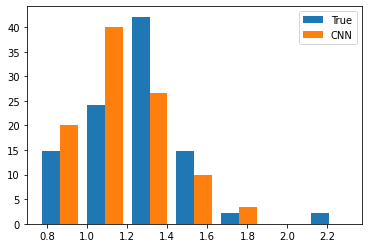

In [36]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [37]:
B = A[0][0]

In [38]:
Novo = []
k = 0
soma = 0
for i in B:
  if(k<4):
    Novo.append(i)
  else:
    soma = soma + i
  k = k + 1
Novo.append(soma)
print(Novo)

[14.736842105263156, 24.2105263157895, 42.1052631578948, 14.736842105263179, 4.21052631578948]


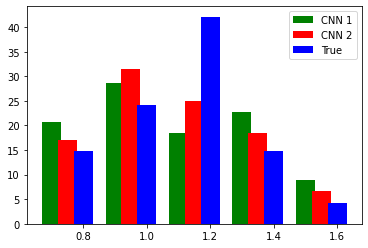

In [39]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = Novo
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])